<a href="https://colab.research.google.com/github/jyothiradithya123/Sirpi-practice-qns/blob/main/Week_5_Linear_Regression_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing** Liraries for the Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import re
import os

# **Loading the Dataset**

In [ ]:
used_cars = pd.read_csv('/content/drive/MyDrive/data/used_cars.csv')
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


There are 4009 rows and 12 columns

In [ ]:
used_cars.shape

(4009, 12)

# ***1.Data Cleaning and Preperation***

# **Finding the Missing values in the dataset**

In [ ]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


There are missing values in fuel type,accident and clean title columns

# **Dropping Unecessary columns from the dataset**

Dropping the columns clean title and interior color column


In [ ]:
used_cars.drop(columns=['clean_title','int_col'],axis=1,inplace=True)

Renaming the exterior color to car color for easy understanding

In [ ]:
used_cars.rename(columns={"ext_col": "car_color"}, inplace=True)

In [ ]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   car_color     4009 non-null   object
 8   accident      3896 non-null   object
 9   price         4009 non-null   object
dtypes: int64(1), object(9)
memory usage: 313.3+ KB


In [ ]:
used_cars['engine'].mode()

,engine
0,2.0L I4 16V GDI DOHC Turbo


In [ ]:
used_cars['fuel_type'].mode()

,fuel_type
0,Gasoline


Looking at the columns where there is electic in engine and fuel type is empty

In [ ]:
used_cars[used_cars["engine"].str.contains("Electric", na=False) & used_cars["fuel_type"].isna()].shape[0]


165

There are total 165 column values matching it so I have filled those fuel type with electric since,the engine is mentioned as electric

In [ ]:
used_cars.loc[used_cars["engine"].str.contains("Electric", na=False) & used_cars["fuel_type"].isna(), "fuel_type"] = "Electric"
used_cars[used_cars["engine"].str.contains("Electric", na=False)]

,brand,model,model_year,milage,fuel_type,engine,transmission,car_color,accident,price
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,None reported,"$15,500"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",Electric,534.0HP Electric Motor Electric Fuel System,A/T,Black,None reported,"$69,950"
44,Lucid,Air Grand Touring,2022,"3,552 mi.",Electric,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,None reported,"$119,999"
60,Volvo,XC90 Hybrid T8 R-Design,2018,"40,000 mi.",Plug-In Hybrid,400.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,None reported,"$42,000"
65,BMW,X4 M40i,2023,"8,500 mi.",Hybrid,382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,None reported,"$67,900"
...,...,...,...,...,...,...,...,...,...,...
3961,Tesla,Model 3 Long Range,2021,"23,749 mi.",Electric,Electric,1-Speed Automatic,White,None reported,"$35,999"
3967,Toyota,Prius Two,2014,"80,354 mi.",Hybrid,134.0HP 1.8L 4 Cylinder Engine Gas/Electric Hy...,A/T,Red,At least 1 accident or damage reported,"$13,310"
3995,Lexus,CT 200h Base,2016,"39,750 mi.",Hybrid,134.0HP 1.8L 4 Cylinder Engine Gas/Electric Hy...,A/T,Black,None reported,"$21,995"
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,"2,000 mi.",Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,None reported,"$175,000"


In [ ]:
used_cars['accident'].mode()

,accident
0,None reported


In the accident column there are 113 missing values and we are filling it with mode values

In [ ]:
used_cars['accident'] = used_cars['accident'].fillna(used_cars['accident'].mode()[0])
used_cars[used_cars['accident'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,car_color,accident,price


In [ ]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5
engine,0
transmission,0
car_color,0
accident,0
price,0


In the fuel type after filling 165 missing values there are 170-165 = 5 missing values which are left out

In [ ]:
used_cars[used_cars['fuel_type'].isna()]
# used_cars[used_cars['fuel_type'].isna()].index

,brand,model,model_year,milage,fuel_type,engine,transmission,car_color,accident,price
383,Ford,Mustang Mach-E Select,2023,923 mi.,NaN,Standard Range Battery,Automatic,Rapid Red Metallic Tinted Clearcoat,None reported,"$46,998"
456,Kia,EV6 Wind,2022,"11,945 mi.",NaN,111.2Ah / FR 70kW / RR 160kW (697V),Automatic,Glacier,None reported,"$38,998"
555,Tesla,Model 3 Long Range,2022,"3,077 mi.",NaN,Dual Motor - Standard,Automatic,Silver,None reported,"$44,998"
1800,Tesla,Model Y Long Range,2022,"4,665 mi.",NaN,Dual Motor - Standard,Automatic,Silver,None reported,"$46,598"
2613,Tesla,Model Y Long Range,2022,"9,411 mi.",NaN,Dual Motor - Standard,Automatic,Silver,None reported,"$47,998"


Their engine specifications are of electric vehicle.So,we have filled the rest 5 missing values in the fuel type with electric

In [ ]:
used_cars["fuel_type"].fillna("Electric", inplace=True)
used_cars[used_cars['fuel_type'].isna()]

<ipython-input-21-c47b007b933c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars["fuel_type"].fillna("Electric", inplace=True)


,brand,model,model_year,milage,fuel_type,engine,transmission,car_color,accident,price


In [ ]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
car_color,0
accident,0
price,0


In [ ]:
used_cars['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported'],
      dtype=object)

Dropping duplicates from the dataset If any

In [ ]:
used_cars = used_cars.drop_duplicates()
used_cars.shape

(4009, 10)

Replacing the accident column values with yes or no,For shorter values for easy analysis

In [ ]:
used_cars['accident'] = used_cars['accident'].replace({"At least 1 accident or damage reported":"Yes","None reported":"No"})
used_cars['accident']

,accident
0,Yes
1,Yes
2,No
3,No
4,No
...,...
4004,No
4005,No
4006,No
4007,No


In [ ]:
used_cars.isnull().sum()


,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
car_color,0
accident,0
price,0


Removing unwanted chaaracters other than :


*   Alphabets
*   Integers

*   Bracker,hiphen,Parantheses
*   And white spaces


*   All the other characters which doesnt include in the above are replaces with the mean of the particular column values







In [ ]:
# Define a regex pattern to match UNWANTED special characters
unwanted_chars_pattern = r"[^a-zA-Z0-9,./\-\(\)\s]"

# Function to check for unwanted special characters in a column
def contains_unwanted_chars(column):
    return used_cars[column].str.contains(unwanted_chars_pattern, na=False)

# Filter rows where either 'engine' or 'fuel_type' contain unwanted characters
special_chars_df = used_cars[contains_unwanted_chars("engine") | contains_unwanted_chars("fuel_type")][["fuel_type", "engine"]]

# Display the filtered results
special_chars_df


,fuel_type,engine


Replacing the unwanted characters present with the mode values of the fuel type and engine

In [ ]:
# Get mode (most frequent value) for each column
fuel_mode = used_cars["fuel_type"].mode()[0]
engine_mode = used_cars["engine"].mode()[0]

# Replace rows where unwanted characters exist with the mode value
used_cars.loc[contains_unwanted_chars("fuel_type"), "fuel_type"] = fuel_mode
used_cars.loc[contains_unwanted_chars("engine"), "engine"] = engine_mode

Checking if still there are chracters left excluding what we have included to be in the regex


In [ ]:
#  Re-check for unwanted special characters after replacement
remaining_issues = used_cars[contains_unwanted_chars("fuel_type") | contains_unwanted_chars("engine")][["fuel_type", "engine"]]

# Display the results
print(remaining_issues)

Empty DataFrame
Columns: [fuel_type, engine]
Index: []


Spliting the engine into meaningful columns :


*   Engine horsepower (integers before hp are extracted seperately in this column)
*   Engine displacement(integers or float values before the l(litres) are extracted into seperate column)



In [ ]:
# Extract horsepower (e.g., "300.0hp")
used_cars['horsepower'] = used_cars['engine'].str.extract(r'(\d+(\.\d+)?)\s*[Hh][Pp]', expand=False)[0]

# Extract engine displacement (e.g., "3.7l")
used_cars['engine_displacement'] = used_cars['engine'].str.extract(r'(\d+(\.\d+)?)\s*[Ll]', expand=False)[0]

# Convert extracted values to numeric
used_cars['horsepower'] = pd.to_numeric(used_cars['horsepower'], errors='coerce')
used_cars['engine_displacement'] = pd.to_numeric(used_cars['engine_displacement'], errors='coerce')

# Display the results
print(used_cars[['engine', 'horsepower', 'engine_displacement']].head())

used_cars[['horsepower','engine_displacement']]

used_cars.head(50)


                                              engine  horsepower  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...       300.0   
1                               3.8L V6 24V GDI DOHC         NaN   
2                                     3.5 Liter DOHC         NaN   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...       354.0   
4                         2.0L I4 16V GDI DOHC Turbo         NaN   

   engine_displacement  
0                  3.7  
1                  3.8  
2                  3.5  
3                  3.5  
4                  2.0  


,brand,model,model_year,milage,fuel_type,engine,transmission,car_color,accident,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Yes,"$10,300",300.0,3.7
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Yes,"$38,005",NaN,3.8
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,No,"$54,598",NaN,3.5
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,No,"$15,500",354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,No,"$34,999",NaN,2.0
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,No,"$14,798",NaN,2.4
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,No,"$31,000",292.0,2.0
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,No,"$7,300",282.0,4.4
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,No,"$41,927",311.0,3.5
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",Electric,534.0HP Electric Motor Electric Fuel System,A/T,Black,No,"$69,950",534.0,NaN


In [ ]:
used_cars.drop(columns='engine',axis=1,inplace=True)
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
transmission,0
car_color,0
accident,0
price,0
horsepower,808


Filling the missing vlaues in the column in engine horsepower and engine displacement with mean values





In [ ]:
horsepower_mean = used_cars['horsepower'].mean()
engine_displacement_mean = used_cars['engine_displacement'].mean()

# Replace NaN with mean values
used_cars['horsepower'].fillna(horsepower_mean, inplace=True)
used_cars['engine_displacement'].fillna(engine_displacement_mean, inplace=True)


<ipython-input-35-b84705c84ebc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars['horsepower'].fillna(horsepower_mean, inplace=True)
<ipython-input-35-b84705c84ebc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
transmission,0
car_color,0
accident,0
price,0
horsepower,0


In [ ]:
used_cars.head(50)

,brand,model,model_year,milage,fuel_type,transmission,car_color,accident,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,6-Speed A/T,Black,Yes,"$10,300",300.000000,3.700000
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,8-Speed Automatic,Moonlight Cloud,Yes,"$38,005",332.206498,3.800000
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,Automatic,Blue,No,"$54,598",332.206498,3.500000
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,7-Speed A/T,Black,No,"$15,500",354.000000,3.500000
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,8-Speed Automatic,Glacier White Metallic,No,"$34,999",332.206498,2.000000
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,F,Silver,No,"$14,798",332.206498,2.400000
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,6-Speed A/T,Blue,No,"$31,000",292.000000,2.000000
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,A/T,Green,No,"$7,300",282.000000,4.400000
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,6-Speed A/T,Black,No,"$41,927",311.000000,3.500000
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",Electric,A/T,Black,No,"$69,950",534.000000,3.664699


Rounding off the horsepower and engine displacement columns float values to one decimal

In [ ]:
used_cars['horsepower'] = used_cars['horsepower'].round(1)
used_cars['engine_displacement'] = used_cars['engine_displacement'].round(1)

used_cars.head()

,brand,model,model_year,milage,fuel_type,transmission,car_color,accident,price,horsepower,engine_displacement
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,6-Speed A/T,Black,Yes,"$10,300",300.0,3.7
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,8-Speed Automatic,Moonlight Cloud,Yes,"$38,005",332.2,3.8
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,Automatic,Blue,No,"$54,598",332.2,3.5
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,7-Speed A/T,Black,No,"$15,500",354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,8-Speed Automatic,Glacier White Metallic,No,"$34,999",332.2,2.0


In [ ]:
# used_cars.head()
# used_cars.drop(columns='engine',axis=1,inplace=True)

Renaming the column names to easy,short and meaningful names like :     


*   engine_hp(Engine HorsePower)
*   engine_dp(Engine Displacement)



In [ ]:
# used_cars.drop(columns='engine',axis=1,inplace=True)
used_cars.rename(columns={'horsepower':'engine_hp','engine_displacement':'engine_dp'},inplace=True)
used_cars.head()

,brand,model,model_year,milage,fuel_type,transmission,car_color,accident,price,engine_hp,engine_dp
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,6-Speed A/T,Black,Yes,"$10,300",300.0,3.7
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,8-Speed Automatic,Moonlight Cloud,Yes,"$38,005",332.2,3.8
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,Automatic,Blue,No,"$54,598",332.2,3.5
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,7-Speed A/T,Black,No,"$15,500",354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,8-Speed Automatic,Glacier White Metallic,No,"$34,999",332.2,2.0


When I used Describe I got column values for engine_hp and engine_dp but other numerical columns where not displayed in the describe as follows :     


*   Milage
*   Price
*   Transmission
*   And this are the columns which need data cleaning for better Data Analysis






In [ ]:
used_cars.describe()

,model_year,engine_hp,engine_dp
count,4009.000000,4009.000000,4009.000000
mean,2015.515590,332.205188,3.666176
std,6.104816,109.242132,1.390158
min,1974.000000,70.000000,0.600000
25%,2012.000000,268.000000,2.500000
50%,2017.000000,332.200000,3.500000
75%,2020.000000,381.000000,4.600000
max,2024.000000,1020.000000,8.400000


So,We extracted the mi and $ symbols and notations using str.replace()

In [ ]:
used_cars['milage'] = used_cars['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)
used_cars['milage']

used_cars['price'] = used_cars['price'].str.replace('$', '').str.replace(',', '').astype(float)

used_cars['price']

# df['milage'] = df['milage'].str.replace(r'[,\s]*mi\.', '', regex=True).astype(float)
# df['price'] = df['price'].str.replace(r'[\$,]', '', regex=True).astype(float)

,price
0,10300.0
1,38005.0
2,54598.0
3,15500.0
4,34999.0
...,...
4004,349950.0
4005,53900.0
4006,90998.0
4007,62999.0


Now it displays all the numerical columns while using the describe after removing strings and converting them to float values

In [ ]:
used_cars.describe()

,model_year,milage,price,engine_hp,engine_dp
count,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000
mean,2015.515590,64717.551010,4.455319e+04,332.205188,3.666176
std,6.104816,52296.599459,7.871064e+04,109.242132,1.390158
min,1974.000000,100.000000,2.000000e+03,70.000000,0.600000
25%,2012.000000,23044.000000,1.720000e+04,268.000000,2.500000
50%,2017.000000,52775.000000,3.100000e+04,332.200000,3.500000
75%,2020.000000,94100.000000,4.999000e+04,381.000000,4.600000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000


In the transmission there 6-Speed,7-Speed,8-Speed which are difficult to analyze because it has numbers and strings together and needs cleaning

In [ ]:
used_cars.head()

,brand,model,model_year,milage,fuel_type,transmission,car_color,accident,price,engine_hp,engine_dp
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Yes,10300.0,300.0,3.7
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Yes,38005.0,332.2,3.8
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,No,54598.0,332.2,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,No,15500.0,354.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,No,34999.0,332.2,2.0


So,In this code Transmission column is cleaned as followed :     


*   The 'speed' string is extracted from the transmission columns
*   If,there is 'automatic' it is replaced with the 0
*   And wherever there is 'manual' it is replaced with 1
*   the transmission column is converted to numeric values for easy analysis in the future   
   





In [ ]:
# Function to clean the 'transmission' column
def clean_transmission(value):
    # Extract numbers for speed values (e.g., "6-Speed", "7-Speed A/T")
    match = re.search(r'(\d+)-Speed', str(value), re.IGNORECASE)
    if match:
        return int(match.group(1))  # Return extracted speed as integer

    # Convert automatic-related terms to 0
    elif "automatic" in str(value).lower() or "a/t" in str(value).lower():
        return 0

    # Convert manual transmission to 1
    elif "manual" in str(value).lower() or "m/t" in str(value).lower():
        return 1

    # If it doesn't match known categories, return NaN (optional: or a default value)
    return None

# Apply the function to the 'transmission' column
used_cars["transmission_clean"] = used_cars["transmission"].apply(clean_transmission)

# Display unique cleaned values
used_cars["transmission_clean"].unique()

# Check if there are any NaN values left
used_cars["transmission_clean"].isna().sum()


486

In [ ]:
# used_cars.head(50)
# used_cars.drop(columns=['transmission_cleaned','transmission'],axis=1,inplace=True)
used_cars.head(50)

used_cars.isnull().sum()



,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
transmission,0
car_color,0
accident,0
price,0
engine_hp,0


Filling the missing values in transmission with mean values

In [ ]:
transmission_mean = used_cars["transmission_clean"].mean()

# Fill missing values with the calculated mean
used_cars["transmission_clean"].fillna(transmission_mean, inplace=True)
used_cars.head(50)

<ipython-input-46-9174f91d00c8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars["transmission_clean"].fillna(transmission_mean, inplace=True)


,brand,model,model_year,milage,fuel_type,transmission,car_color,accident,price,engine_hp,engine_dp,transmission_clean
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Yes,10300.0,300.0,3.7,6.000000
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Yes,38005.0,332.2,3.8,8.000000
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,No,54598.0,332.2,3.5,0.000000
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,No,15500.0,354.0,3.5,7.000000
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,No,34999.0,332.2,2.0,8.000000
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,F,Silver,No,14798.0,332.2,2.4,4.195288
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,6-Speed A/T,Blue,No,31000.0,292.0,2.0,6.000000
7,BMW,740 iL,2001,242000.0,Gasoline,A/T,Green,No,7300.0,282.0,4.4,0.000000
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,6-Speed A/T,Black,No,41927.0,311.0,3.5,6.000000
9,Tesla,Model X Long Range Plus,2020,34000.0,Electric,A/T,Black,No,69950.0,534.0,3.7,0.000000


In [ ]:
used_cars.drop(columns=['transmission'],axis=1,inplace=True)

Rounding off transmission column values to one decimal

In [ ]:
used_cars["transmission_clean"] = used_cars["transmission_clean"].round(1)
used_cars.rename(columns={'transmission_clean':'transmission'},inplace=True)
used_cars.head(50)

KeyError: 'transmission_clean'

All the missing vlaues are handled

In [ ]:
used_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
car_color,0
accident,0
price,0
engine_hp,0
engine_dp,0


All the numerical columns are ready for data analysis


In [ ]:
used_cars.describe()

,model_year,milage,price,engine_hp,engine_dp,transmission
count,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000,4009.000000
mean,2015.515590,64717.551010,4.455319e+04,332.205188,3.666176,4.195859
std,6.104816,52296.599459,7.871064e+04,109.242132,1.390158,3.397694
min,1974.000000,100.000000,2.000000e+03,70.000000,0.600000,0.000000
25%,2012.000000,23044.000000,1.720000e+04,268.000000,2.500000,0.000000
50%,2017.000000,52775.000000,3.100000e+04,332.200000,3.500000,4.200000
75%,2020.000000,94100.000000,4.999000e+04,381.000000,4.600000,7.000000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000,10.000000


The models in the car dataset are in big strings and will not be suitable to mark in the graph labels easily

In [ ]:
used_cars.model.unique()

array(['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350',
       ..., 'Martin DB7 Vantage Volante', 'Impala 2LZ', 'Taycan'],
      dtype=object)

Created a function(shorten_model_name):


*   It shortens the string to 2 words
*   applied that function to the models column



In [ ]:
def shorten_model_name(model_name):
    words = str(model_name).split()  # Split model name into words
    return " ".join(words[:2])  # Keep only the first two words

# Apply function to the 'model' column
used_cars["models"] = used_cars["model"].apply(shorten_model_name)

used_cars.head(50)


,brand,model,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,Black,Yes,10300.0,300.0,3.7,6.0,Utility Police
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,Moonlight Cloud,Yes,38005.0,332.2,3.8,8.0,Palisade SEL
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Blue,No,54598.0,332.2,3.5,0.0,RX 350
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,Black,No,15500.0,354.0,3.5,7.0,Q50 Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,Glacier White Metallic,No,34999.0,332.2,2.0,8.0,Q3 45
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,Silver,No,14798.0,332.2,2.4,4.2,ILX 2.4L
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,Blue,No,31000.0,292.0,2.0,6.0,S3 2.0T
7,BMW,740 iL,2001,242000.0,Gasoline,Green,No,7300.0,282.0,4.4,0.0,740 iL
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,Black,No,41927.0,311.0,3.5,6.0,RC 350
9,Tesla,Model X Long Range Plus,2020,34000.0,Electric,Black,No,69950.0,534.0,3.7,0.0,Model X


In [ ]:
# used_cars.drop(columns='model_short',axis=1,inplace=True)
used_cars.models.unique()
used_cars.head(50)

,brand,model,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,Black,Yes,10300.0,300.0,3.7,6.0,Utility Police
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,Moonlight Cloud,Yes,38005.0,332.2,3.8,8.0,Palisade SEL
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Blue,No,54598.0,332.2,3.5,0.0,RX 350
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,Black,No,15500.0,354.0,3.5,7.0,Q50 Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,Glacier White Metallic,No,34999.0,332.2,2.0,8.0,Q3 45
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,Silver,No,14798.0,332.2,2.4,4.2,ILX 2.4L
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,Blue,No,31000.0,292.0,2.0,6.0,S3 2.0T
7,BMW,740 iL,2001,242000.0,Gasoline,Green,No,7300.0,282.0,4.4,0.0,740 iL
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,Black,No,41927.0,311.0,3.5,6.0,RC 350
9,Tesla,Model X Long Range Plus,2020,34000.0,Electric,Black,No,69950.0,534.0,3.7,0.0,Model X


This function removes the integers in model making it filled with only string values

In [ ]:
# Function to remove numbers from model names
def remove_numbers(model_name):
    return re.sub(r'\d+', '', model_name).strip()  # Remove digits and extra spaces

# Apply the function to the 'model_short' column
used_cars["models"] = used_cars["models"].apply(remove_numbers)

In [ ]:
used_cars.drop(columns='model',axis=1,inplace=True)
used_cars.head(50)

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
0,Ford,2013,51000.0,E85 Flex Fuel,Black,Yes,10300.0,300.0,3.7,6.0,Utility Police
1,Hyundai,2021,34742.0,Gasoline,Moonlight Cloud,Yes,38005.0,332.2,3.8,8.0,Palisade SEL
2,Lexus,2022,22372.0,Gasoline,Blue,No,54598.0,332.2,3.5,0.0,RX
3,INFINITI,2015,88900.0,Hybrid,Black,No,15500.0,354.0,3.5,7.0,Q Hybrid
4,Audi,2021,9835.0,Gasoline,Glacier White Metallic,No,34999.0,332.2,2.0,8.0,Q
5,Acura,2016,136397.0,Gasoline,Silver,No,14798.0,332.2,2.4,4.2,ILX .L
6,Audi,2017,84000.0,Gasoline,Blue,No,31000.0,292.0,2.0,6.0,S .T
7,BMW,2001,242000.0,Gasoline,Green,No,7300.0,282.0,4.4,0.0,iL
8,Lexus,2021,23436.0,Gasoline,Black,No,41927.0,311.0,3.5,6.0,RC
9,Tesla,2020,34000.0,Electric,Black,No,69950.0,534.0,3.7,0.0,Model X


In [ ]:
used_cars.models.unique()

array(['Utility Police', 'Palisade SEL', 'RX', ..., 'Martin DB',
       'Impala LZ', 'Taycan'], dtype=object)

In [ ]:
used_cars.isnull().sum()

,0
brand,0
model_year,0
milage,0
fuel_type,0
car_color,0
accident,0
price,0
engine_hp,0
engine_dp,0
transmission,0


In [ ]:
used_cars['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

There are total 57 unique brands of cars

In [ ]:
used_cars['brand'].nunique()

57

And there are a total of 1046 models of cars

In [ ]:
used_cars.models.nunique()

1046

Getting the no. of cars in each brand

In [ ]:
used_cars.brand.value_counts()

,count
brand,
Ford,386
BMW,375
Mercedes-Benz,315
Chevrolet,292
Porsche,201
Audi,200
Toyota,199
Lexus,163
Jeep,143


Also finding the no. of cars in each model


In [ ]:
used_cars['models'].value_counts()

,count
models,
i,106
Rover Range,97
M Base,70
X xDrivei,59
Carrera,56
...,...
Navigator Premiere,1
Corolla Hybrid,1
Maverick Lariat,1


In [ ]:
used_cars.describe()

,model_year,milage,price,engine_hp,engine_dp,transmission
count,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000,4009.000000
mean,2015.515590,64717.551010,4.455319e+04,332.205188,3.666176,4.195859
std,6.104816,52296.599459,7.871064e+04,109.242132,1.390158,3.397694
min,1974.000000,100.000000,2.000000e+03,70.000000,0.600000,0.000000
25%,2012.000000,23044.000000,1.720000e+04,268.000000,2.500000,0.000000
50%,2017.000000,52775.000000,3.100000e+04,332.200000,3.500000,4.200000
75%,2020.000000,94100.000000,4.999000e+04,381.000000,4.600000,7.000000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000,10.000000


In [ ]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model_year    4009 non-null   int64  
 2   milage        4009 non-null   float64
 3   fuel_type     4009 non-null   object 
 4   car_color     4009 non-null   object 
 5   accident      4009 non-null   object 
 6   price         4009 non-null   float64
 7   engine_hp     4009 non-null   float64
 8   engine_dp     4009 non-null   float64
 9   transmission  4009 non-null   float64
 10  models        4009 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 344.7+ KB


Checing for the electic cars data in the brand Ford

In [ ]:
ecars = used_cars[used_cars['fuel_type'].str.strip().str.lower() == 'electric']
ford_ecars = ecars[ecars['brand'].str.strip().str.lower() == 'ford']
ford_ecars


,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
383,Ford,2023,923.0,Electric,Rapid Red Metallic Tinted Clearcoat,No,46998.0,332.2,3.7,0.0,Mustang Mach-E
721,Ford,2021,24000.0,Electric,White,No,38000.0,290.0,3.7,1.0,Mustang Mach-E
746,Ford,2021,17850.0,Electric,Red,No,41999.0,266.0,3.7,0.0,Mustang Mach-E
752,Ford,2022,5800.0,Electric,White,No,42500.0,346.0,3.7,1.0,Mustang Mach-E
1522,Ford,2023,208.0,Electric,Gray,No,89000.0,563.0,3.7,0.0,F- Lightning
1651,Ford,2022,7661.0,Electric,Star White,No,49599.0,332.2,3.7,1.0,Mustang Mach-E
2952,Ford,2023,13232.0,Electric,Gray,No,45000.0,346.0,3.7,1.0,Mustang Mach-E
3224,Ford,2022,13856.0,Electric,White,No,54000.0,480.0,3.7,1.0,Mustang Mach-E
3502,Ford,2022,8000.0,Electric,Blue,No,60999.0,480.0,3.7,1.0,Mustang Mach-E
3709,Ford,2021,18000.0,Electric,Blue,No,39499.0,266.0,3.7,0.0,Mustang Mach-E


Checking the unique fuel types in the data

In [ ]:
used_cars.fuel_type.nunique()

7

There are total 7 fuel types of cars

In [ ]:
used_cars['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Electric', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

There are 5 electric cars in BMW

In [ ]:
num_electric_bmws = used_cars[(used_cars['brand'].str.lower() == 'bmw') & (used_cars['fuel_type'].str.lower() == 'electric')]
num_electric_bmws

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
1098,BMW,2014,29553.0,Electric,Black,No,12800.0,170.0,0.6,1.0,i Base
3090,BMW,2019,16975.0,Electric,Black,No,26990.0,170.0,0.6,0.0,i Ah
3255,BMW,2015,26000.0,Electric,White,No,14999.0,170.0,0.6,1.0,i Base
3324,BMW,2014,74500.0,Electric,White,No,11499.0,170.0,0.6,0.0,i Base
3468,BMW,2017,43000.0,Electric,Black,No,16500.0,170.0,0.6,1.0,i


In [ ]:
used_cars[(used_cars['brand'] == 'BMW') & (used_cars['fuel_type'] == 'Electric')]

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
1098,BMW,2014,29553.0,Electric,Black,No,12800.0,170.0,0.6,1.0,i Base
3090,BMW,2019,16975.0,Electric,Black,No,26990.0,170.0,0.6,0.0,i Ah
3255,BMW,2015,26000.0,Electric,White,No,14999.0,170.0,0.6,1.0,i Base
3324,BMW,2014,74500.0,Electric,White,No,11499.0,170.0,0.6,0.0,i Base
3468,BMW,2017,43000.0,Electric,Black,No,16500.0,170.0,0.6,1.0,i


The most expensive car is Maserati and it costs : 2,95,4083$.

In [ ]:
max_price = used_cars['price'].max()

In [ ]:
used_cars[used_cars['price'] == max_price]

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
693,Maserati,2005,32000.0,Gasoline,Red,Yes,2954083.0,394.0,4.2,4.2,Quattroporte Base


The most expensive Audi car is of the model R8 5.2 V10 performance and it costs 187900.0$

In [ ]:
audi_data = used_cars[used_cars['brand'] == 'Audi']
max_price_audi = audi_data['price'].max()
audi_data[audi_data['price'] == max_price_audi]

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
1016,Audi,2020,12245.0,Gasoline,Daytona Gray Pearl Effect w/ Black Roof,No,187900.0,332.2,5.2,7.0,R .


In [ ]:
used_cars.shape

(4009, 11)

Outliers are the most extremes values in the data. It is an abnormal observations that deviate from the normal behaviour of the data.

Outliers do not fit in the normal behavior of the data.

* Detect Outliers using following methods
    1. Boxplot
    2. Histogram
    3. Scatter plot
    4. Z-score
    5. Inter quartile range(values out of 1.5 time of IQR)

* Handle Outlier using following methods

    1. Remove the outliers.
    2. Replace outlier with suitable values by using following methods:-
      *  Quantile method
      *  Inter quartile range
    3. Use that ML model which are not sensitive to outliers
    4. Like:-KNN, Decision Tree, SVM, Naïve Bayes, Ensemble methods




In [ ]:
#Function to detect outlier in one-dimensional datasets.
def find_anomaliesS(used_cars):
  #define a list to accumulate anomalies
  anomalies = []

  #set upper and lower limit to 3 standard deviation
  random_data_std = statistics.stdev(used_cars)    #Sigma
  random_data_mean = statistics.mean(used_cars)    #Knnew
  #3- standard deviation

  anomaly_cut_off = random_data_std *3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  #Generate Outliers
  for outlier in used_cars:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies


In [ ]:
outliers_price = find_anomaliesS(used_cars['price'])

In [ ]:
len(outliers_price)

31

In [ ]:
len(used_cars)

4009

When we caluclate 31/4009*100 = 0.7 so we get 0.7,which is around 0.7% of the price data is in the outiers which are 31  and 0.3% is considered properly distributed

In [ ]:
used_cars.price.skew()

19.51355120421606

<Axes: xlabel='price', ylabel='Density'>

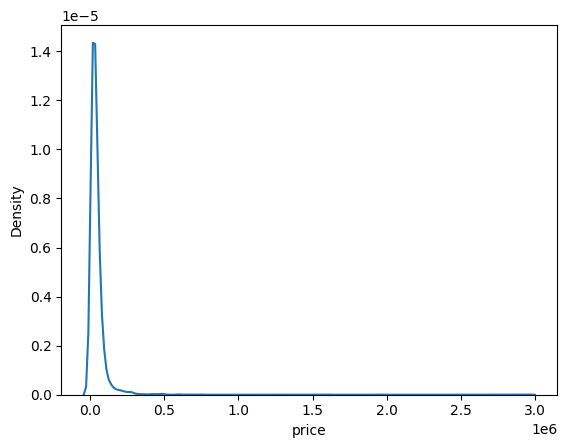

In [ ]:
sns.kdeplot(used_cars.price)

In [ ]:
outliers_horsepower = find_anomaliesS(used_cars['engine_hp'])

In [ ]:
len(outliers_horsepower)

47

There is 1.17% of the data that is 47 outliers in the engine horsepower data

In [ ]:
len(used_cars)

4009

In [ ]:
used_cars.engine_hp.skew()

1.060050709321225

We can detect the outliers in the following box plot where there points distant from 25 or 75 percentile of the quantile range

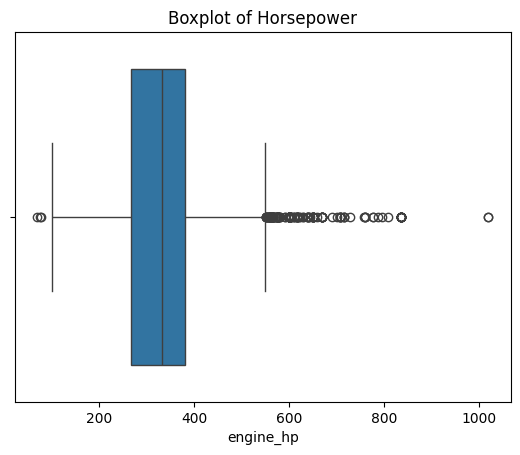

In [ ]:
sns.boxplot(x=used_cars['engine_hp'])
plt.title('Boxplot of Horsepower')
plt.show()

In [ ]:
numerical_cols = used_cars.select_dtypes(include=['number']).columns
used_cars[numerical_cols].describe()

,model_year,milage,price,engine_hp,engine_dp,transmission
count,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000,4009.000000
mean,2015.515590,64717.551010,4.455319e+04,332.205188,3.666176,4.195859
std,6.104816,52296.599459,7.871064e+04,109.242132,1.390158,3.397694
min,1974.000000,100.000000,2.000000e+03,70.000000,0.600000,0.000000
25%,2012.000000,23044.000000,1.720000e+04,268.000000,2.500000,0.000000
50%,2017.000000,52775.000000,3.100000e+04,332.200000,3.500000,4.200000
75%,2020.000000,94100.000000,4.999000e+04,381.000000,4.600000,7.000000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000,10.000000


The number of outliers present in each columns are as followed :     


*   Model_year   :  41  
*   Milage       :  41  
*   Price        :  31  
*   Engine_hp    :  47   
*   Engine_dp    :  7   
*   Transmission :  0




In [ ]:
# Function to detect outliers in each numerical column
outliers_dict = {}

for col in numerical_cols:
    outliers_dict[col] = find_anomaliesS(used_cars[col].dropna())  # Drop NaNs for calculation

# Print the number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"Column: {col}, Outliers Found: {len(outliers)}")

Column: model_year, Outliers Found: 41
Column: milage, Outliers Found: 41
Column: price, Outliers Found: 31
Column: engine_hp, Outliers Found: 47
Column: engine_dp, Outliers Found: 7
Column: transmission, Outliers Found: 0


Visualizing outliers in differnt columns using box plot

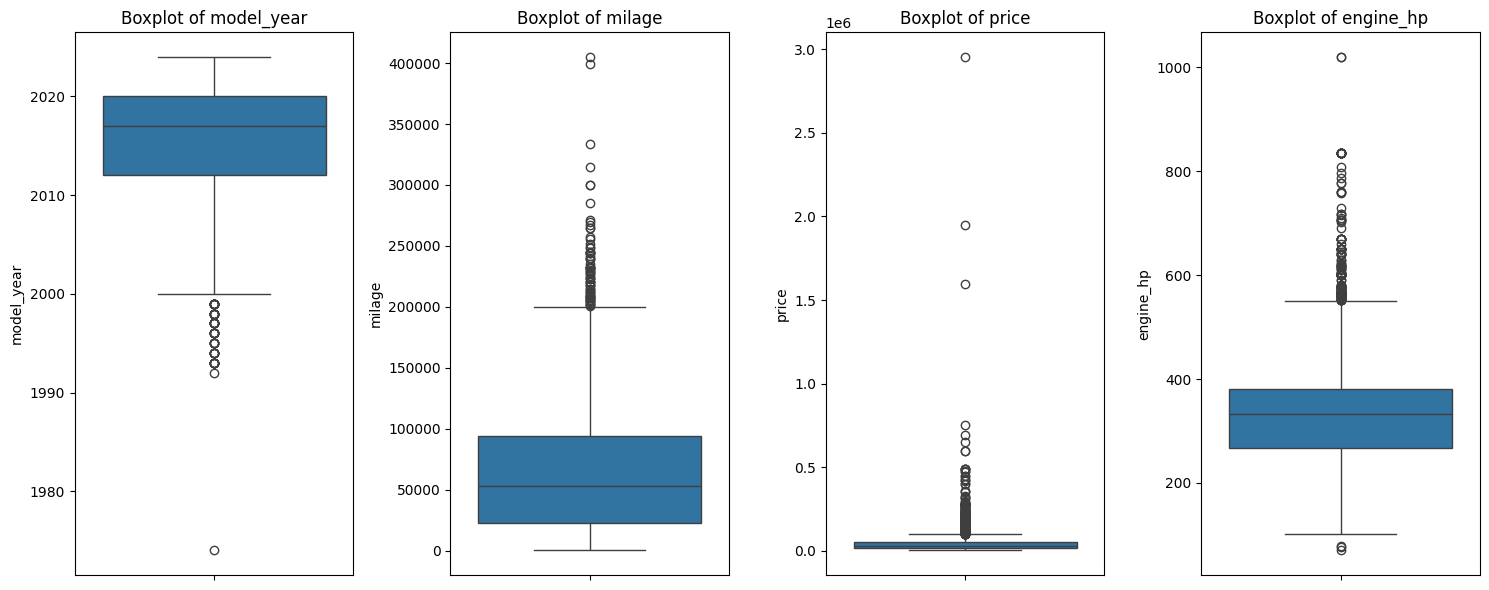

In [ ]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols[:4]):  # Limiting to first 4 columns for clarity
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=used_cars[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Visualizing the different outliers using the histogram

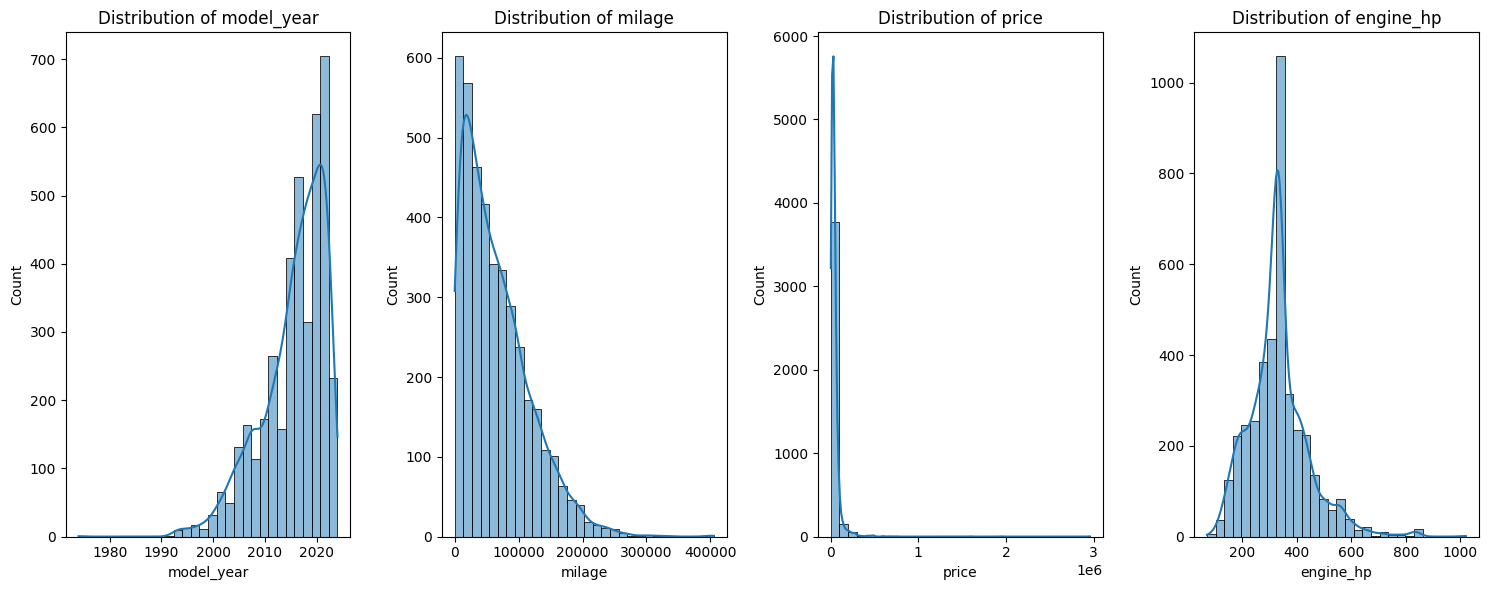

In [ ]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols[:4]):  # Limiting to first 4 columns
    plt.subplot(1, 4, i + 1)
    sns.histplot(used_cars[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
for col in numerical_cols:
    if col == 'price':
        continue  # Skip the 'price' column

    # Calculate limits
    std_dev = used_cars[col].std()
    mean_val = used_cars[col].mean()
    upper_limit = mean_val + (3 * std_dev)
    lower_limit = mean_val - (3 * std_dev)

    # Remove outliers for the column
    used_cars = used_cars[(used_cars[col] >= lower_limit) & (used_cars[col] <= upper_limit)]

print("Outliers removed from all numerical columns except 'price'!")

Outliers removed from all numerical columns except 'price'!


The outliers are handled and are the the distribution is now in correct range:  


*   11/4009 * 100 = 0.27%
*   13/4009 * 100 = 0.32%
*   40/4009 * 100 = 0.99%
*   16/4009 * 100 = 0.39%

So,the outliers for the columns model year,milage,price,engine horsepower are 0.27,0.32,0.99 and 0.39 percentages respectively.


In [ ]:
outliers_dict = {}

for col in numerical_cols:
    outliers_dict[col] = find_anomaliesS(used_cars[col].dropna())  # Drop NaNs for calculation

# Print the number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"Column: {col}, Outliers Found after removal : {len(outliers)}")

Column: model_year, Outliers Found after removal : 11
Column: milage, Outliers Found after removal : 13
Column: price, Outliers Found after removal : 40
Column: engine_hp, Outliers Found after removal : 16
Column: engine_dp, Outliers Found after removal : 0
Column: transmission, Outliers Found after removal : 0


In [ ]:
used_cars[numerical_cols].describe()


,model_year,milage,price,engine_hp,engine_dp,transmission
count,3875.000000,3875.000000,3.875000e+03,3875.000000,3875.000000,3875.000000
mean,2015.782194,62808.952516,4.362593e+04,327.798916,3.646194,4.261058
std,5.647450,48099.749501,7.174851e+04,98.766016,1.370407,3.400288
min,1998.000000,100.000000,2.000000e+03,70.000000,0.600000,0.000000
25%,2013.000000,23240.000000,1.757450e+04,268.000000,2.500000,0.000000
50%,2017.000000,52253.000000,3.145000e+04,332.200000,3.500000,5.000000
75%,2020.000000,92323.000000,4.950000e+04,380.000000,4.600000,7.000000
max,2024.000000,218000.000000,2.954083e+06,660.000000,7.300000,10.000000


This is the graph after the outliers are handled in the dataset

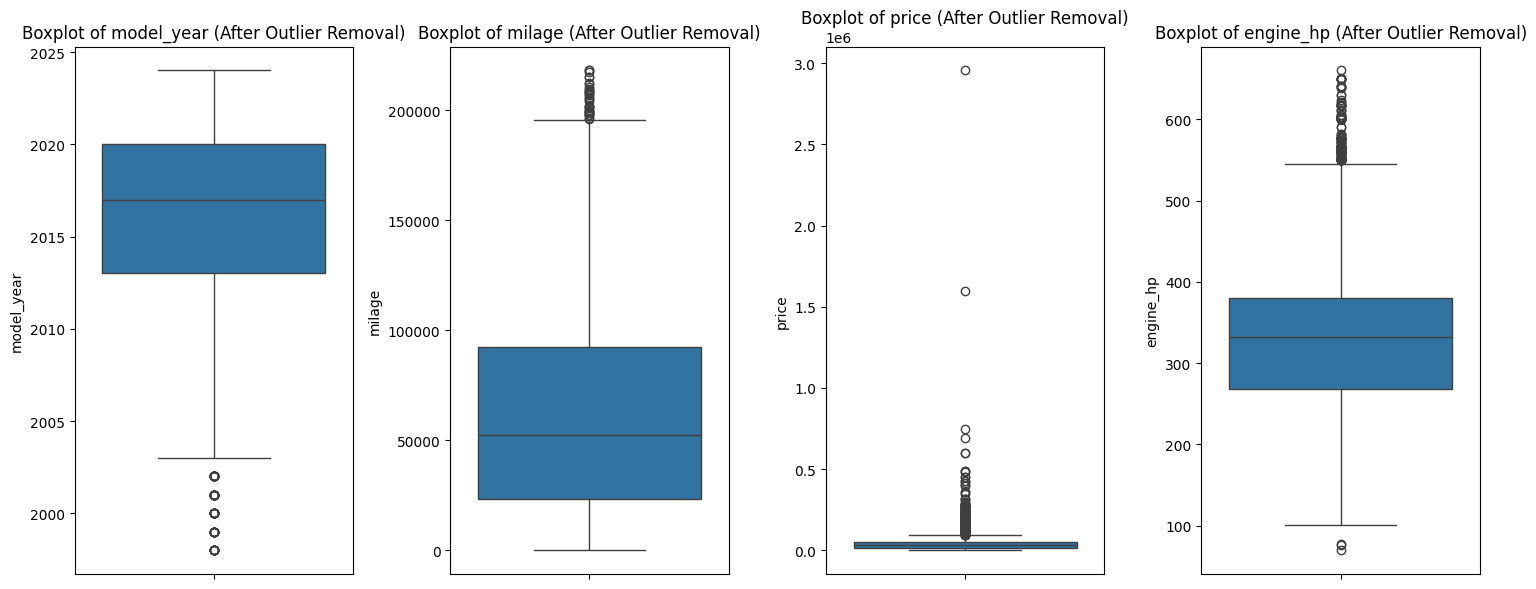

In [ ]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols[:4]):  # Limiting to first 4 for clarity
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=used_cars[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [ ]:
outliers_dict = {}

for col in numerical_cols:
    outliers_dict[col] = find_anomaliesS(used_cars[col].dropna())  # Drop NaNs for calculation

# Print the number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"Column: {col}, Outliers Found: {len(outliers)}")

Column: model_year, Outliers Found: 11
Column: milage, Outliers Found: 13
Column: price, Outliers Found: 40
Column: engine_hp, Outliers Found: 16
Column: engine_dp, Outliers Found: 0
Column: transmission, Outliers Found: 0


In [ ]:
len(outliers_price)

31

In [ ]:


len(outliers_horsepower)

47

In [ ]:
# for col in numerical_cols:
#     Q1 = used_cars[col].quantile(0.25)
#     Q3 = used_cars[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = used_cars[(used_cars[col] < lower_bound) | (used_cars[col] > upper_bound)]
#     print(f"{col}: {len(outliers)} outliers remaining")


In [ ]:
used_cars['price'] = np.log1p(used_cars['price'])

In [ ]:
used_cars.price.skew()

0.0971713996962782

In [ ]:
list2 = find_anomaliesS(used_cars.price)

In [ ]:
len(list2)

23

In [ ]:
len(used_cars)

3875

<Axes: xlabel='price', ylabel='Density'>

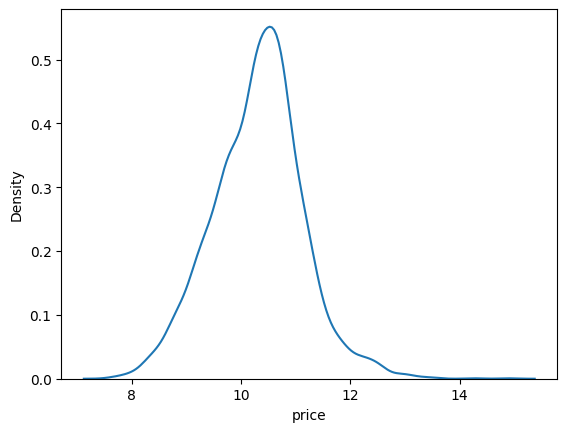

In [ ]:
sns.kdeplot(used_cars.price)

In [ ]:
outliers_dict = {}

for col in numerical_cols:
    outliers_dict[col] = find_anomaliesS(used_cars[col].dropna())  # Drop NaNs for calculation

# Print the number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"Column: {col}, Outliers Found: {len(outliers)}")

Column: model_year, Outliers Found: 11
Column: milage, Outliers Found: 13
Column: price, Outliers Found: 23
Column: engine_hp, Outliers Found: 16
Column: engine_dp, Outliers Found: 0
Column: transmission, Outliers Found: 0


Visualizing the scatter plots on mileage and price


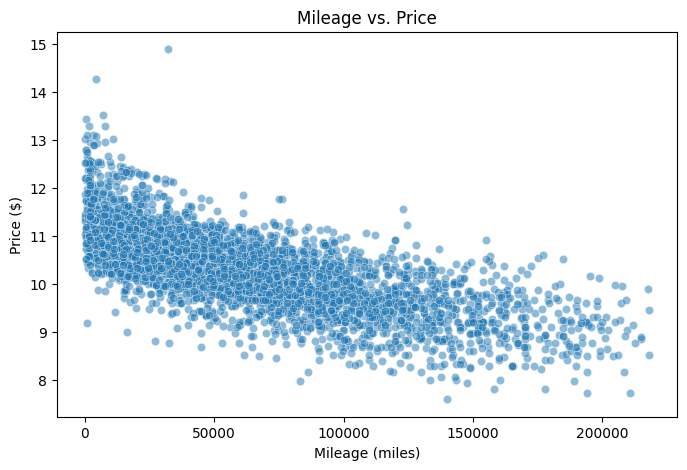

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=used_cars['milage'], y=used_cars['price'], alpha=0.5)
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price ($)")
plt.show()


*   If we see a negative trend (downward slope), it means higher mileage cars are cheaper


1. As the mileage of a car increases, its price tends to decrease. This trend aligns with the typical market behavior where higher mileage reflects greater wear and tear, reducing the car's value.
2.
Cars with lower mileage tend to retain a higher price, likely because they are perceived as being less used and in better condition. Conversely, cars with higher mileage are sold for a lower price due to increased usage and potential maintenance costs.
3.
The scatter plot might show denser clusters at lower mileage values, indicating that most cars in the dataset have relatively low mileage. This could suggest a bias in the dataset towards newer or less-driven cars.


Visualizing the price distribution of cars using histogram

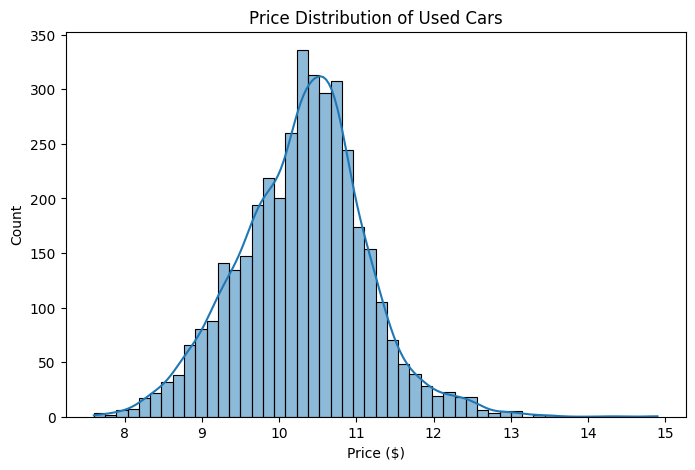

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(used_cars['price'], bins=50, kde=True)
plt.title("Price Distribution of Used Cars")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

*   If the price spikes near low values, most cars are cheap.
*   If the tail extends far right, it means some very expensive cars exist (outliers).

1. The histogram peaks between $11,000 and $13,000, indicating that most used cars in the dataset are priced within this range. This is likely the sweet spot for affordability and demand in the used car market.
2. Beyond the $13,000 range, the frequency of cars decreases gradually, suggesting fewer vehicles are available at higher price points. This aligns with the general trend of decreasing affordability and demand for premium or luxury used cars.
3. The KDE (Kernel Density Estimate) curve complements the histogram by showing a smooth distribution, confirming that the majority of prices cluster in the mid-range, with a long tail for higher-priced vehicles.
4. The steep decline after the peak might indicate that buyers are less interested in vehicles priced above the mid-range or that the dataset contains fewer high-end or luxu



Visualizing the year and price using the box plots

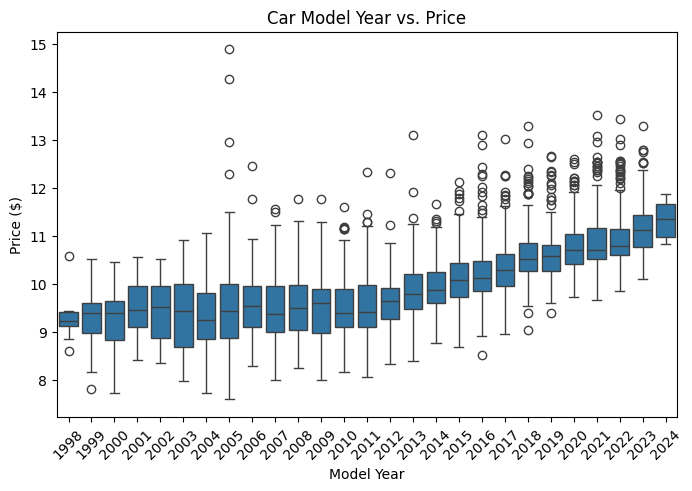

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=used_cars['model_year'], y=used_cars['price'])
plt.xticks(rotation=45)
plt.title("Car Model Year vs. Price")
plt.xlabel("Model Year")
plt.ylabel("Price ($)")
plt.show()

*   If price increases for newer cars, newer models cost more.

1. The gradual increase in price with newer model years suggests a positive correlation. Newer cars typically have higher prices due to advanced features, better condition, and higher market value.
2. Older cars are priced significantly lower, reflecting the natural depreciation of vehicles over time. This trend aligns with the general market perception that older models have reduced utility and value.
3. Older model years might show wider box plots or more outliers, indicating greater variability in price. This could result from factors like rarity, condition, or historical significance of certain models.
4. Newer model years (e.g., 2020-2023) may have tighter box plots, showing less variability. This suggests that their prices are more standardized, likely because they are still relatively new and consistent in features.




Visualizing engine horsepower and its price

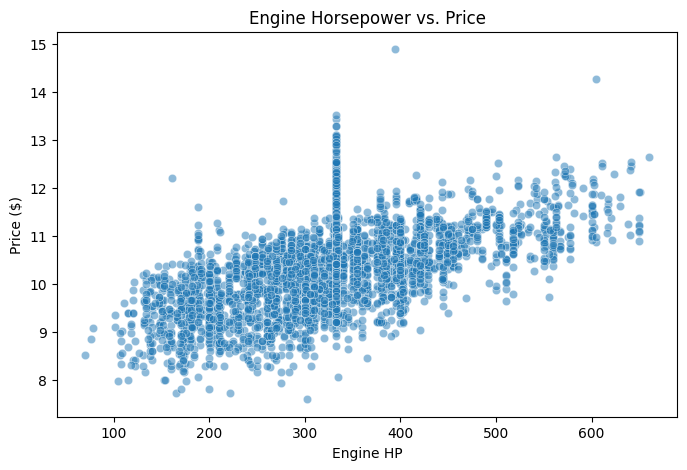

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=used_cars['engine_hp'], y=used_cars['price'], alpha=0.5)
plt.title("Engine Horsepower vs. Price")
plt.xlabel("Engine HP")
plt.ylabel("Price ($)")
plt.show()

1. The inclining trend indicates a positive correlation between engine horsepower and price. Cars with higher horsepower generally command higher prices due to their better performance and power.
2. High-horsepower vehicles often belong to premium, luxury, or sports categories. This trend reflects the added value buyers associate with performance-oriented cars.
3. The scatter plot may reveal denser clusters at lower horsepower levels, suggesting that the majority of cars in the dataset are within standard or mid-range horsepower categories.
4. Some points may deviate from the general trend, such as low-priced cars with high horsepower or high-priced cars with low horsepower. These could be unique cases like heavily discounted vehicles or rare models.

Visualizing fuel type distributions

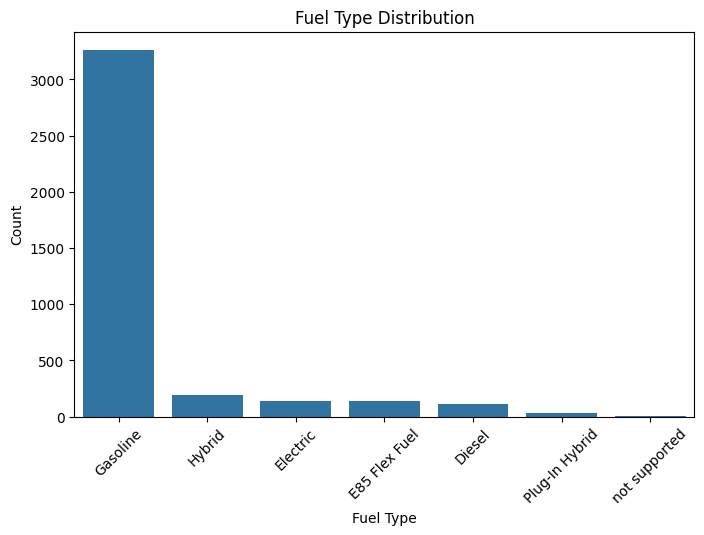

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=used_cars['fuel_type'], order=used_cars['fuel_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

  The electric/hybrid is low, market still favors gasoline.

  1. The plot indicates that gasoline is the most commonly used fuel type in the dataset. This reflects its widespread adoption due to accessibility and affordability in many regions.
  2. Other fuel types like diesel, hybrid, or electric have significantly lower counts. This highlights a limited representation of alternative fuel vehicles, suggesting slower adoption or fewer available models.
3. The dominance of gasoline could indicate that the dataset primarily represents conventional cars. The low count for hybrids or electrics might reflect emerging markets or limited consumer demand.
4. The fuel type distribution may be influenced by the region from which the dataset is sourced. Gasoline's prevalence could correlate with the infrastructure and policies of the area.

Visualizing the transmission type and price

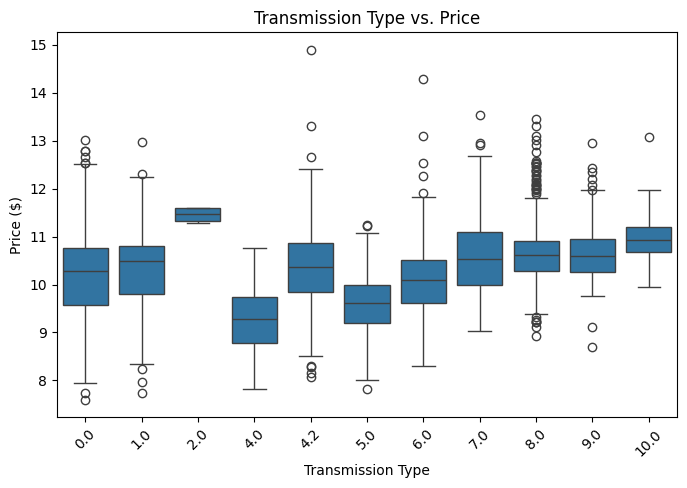

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=used_cars['transmission'], y=used_cars['price'])
plt.xticks(rotation=45)
plt.title("Transmission Type vs. Price")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.show()

1. Transmission types labeled 0 (automatic) and 1 (manual) have median prices clustered around $10,000–$11,000. This indicates that these transmission types dominate lower-priced segments, likely representing standard or budget-friendly vehicles.
2. Transmission type 2 shows a median price around 12,000, suggesting that vehicles with this transmission type are in a slightly higher price range. This could be associated with advanced automatic systems or dual clutch transmissions found in mid range or premium vehicles.
3. Transmission types labeled 3 to 10 have prices that vary between $10,000 and $12,000. This variability might represent niche or less common transmission systems, like CVTs or specialized types in luxury or performance models.
4. The differences in median prices indicate market segmentation based on transmission types. Standard options (0 and 1) cater to the broader audience, while type 2 and others seem to target niche or premium customers.

Correlation

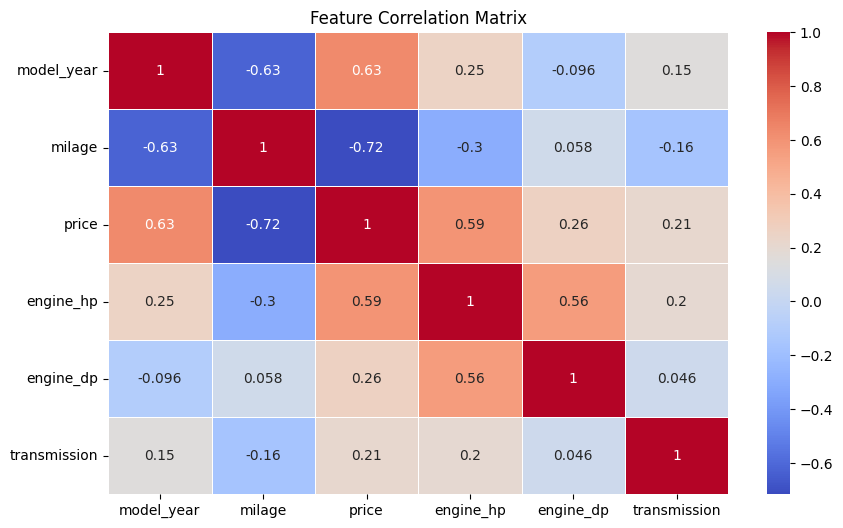

In [ ]:
plt.figure(figsize=(10,6))
# Select only numeric columns for correlation
numeric_used_cars = used_cars.select_dtypes(include=['number'])
sns.heatmap(numeric_used_cars.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Look for strong correlations (values closer to +1 or -1).
Example: If price and engine_hp are highly correlated, higher HP = higher price.

1. A strong positive correlation (close to 1) indicates that as the engine horsepower increases, the price of the vehicle also tends to increase.
Engine Displacement and Price:
Higher engine displacement values are positively correlated with higher prices, as larger engines are typically associated with premium or performance vehicles.
2. Mileage has a negative correlation with price, which is expected since cars with higher mileage are often less expensive due to wear and tear.
Model Year and Mileage:
Newer model years are negatively correlated with mileage, as newer cars generally have fewer miles on them.
3. Features like accident history or other minor details might have weak correlations with price, showing they have less impact on pricing decisions in this dataset.
4. Some features may show near-zero correlation, implying no linear relationship with price or other features. These may require different analytical methods to assess their impact.


1.   Price vs. Mileage: Likely a negative trend (higher mileage → lower price).
2.   Price Distribution: Might be right-skewed with some expensive cars
     (outliers).
3.  Model Year vs. Price: Newer cars tend to cost more, but some years may show
    dips.
4.  Engine HP vs. Price: Likely a positive trend (more HP → higher price).
5.  Fuel Type Distribution: Shows dominant fuel type (gasoline, diesel,
    electric).
6.  Transmission vs. Price: Automatics may be priced higher than manuals.
7.  Correlation Matrix: Helps see which factors strongly impact price.



In [ ]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3875 non-null   object 
 1   model_year    3875 non-null   int64  
 2   milage        3875 non-null   float64
 3   fuel_type     3875 non-null   object 
 4   car_color     3875 non-null   object 
 5   accident      3875 non-null   object 
 6   price         3875 non-null   float64
 7   engine_hp     3875 non-null   float64
 8   engine_dp     3875 non-null   float64
 9   transmission  3875 non-null   float64
 10  models        3875 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 363.3+ KB


In [ ]:
current_year = 2024

# Calculate years in market
used_cars['years_in_market'] = current_year - used_cars['model_year']
used_cars['years_in_market'] = used_cars['years_in_market'].replace(0, 1)  # Avoid division by zero

# Estimate sales per year (assuming count of models sold represents total sales)
used_cars['sales_per_year'] = used_cars.groupby('models')['models'].transform('count') / used_cars['years_in_market']
used_cars['sales_per_year'] = used_cars['sales_per_year'].round(1)  # Round to 1 decimal place

# Compute average selling price per year
avg_price_per_year = used_cars.groupby('model_year')['price'].mean()
total_sales_per_year = used_cars.groupby('model_year')['sales_per_year'].sum()

years_in_market is computed as the difference between the current year (2024) and the car's model_year.
If a car is from the current year (2024), its market age would be 0. The replace(0, 1) ensures that division by zero is avoided in subsequent calculations.

groupby('models')['models'].transform('count'): Counts how many times each car model appears in the dataset, representing the total sales for that model.
Dividing this count by years_in_market gives the estimated sales per year.
round(1): Rounds the value to one decimal place for easier readability.

To compute the average price of cars sold each year.
groupby('model_year'): Groups the dataset by the year the cars were manufactured (model_year).
.mean(): Calculates the mean price of cars for each model_year.

groupby('model_year')['sales_per_year'].sum(): Sums up the sales_per_year for all car models of a given model_year




In [ ]:

used_cars.head(50)

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models
0,Ford,2013,51000.0,E85 Flex Fuel,Black,Yes,9.239996,300.0,3.7,6.0,Utility Police
1,Hyundai,2021,34742.0,Gasoline,Moonlight Cloud,Yes,10.545499,332.2,3.8,8.0,Palisade SEL
2,Lexus,2022,22372.0,Gasoline,Blue,No,10.907771,332.2,3.5,0.0,RX
3,INFINITI,2015,88900.0,Hybrid,Black,No,9.648660,354.0,3.5,7.0,Q Hybrid
4,Audi,2021,9835.0,Gasoline,Glacier White Metallic,No,10.463103,332.2,2.0,8.0,Q
5,Acura,2016,136397.0,Gasoline,Silver,No,9.602315,332.2,2.4,4.2,ILX .L
6,Audi,2017,84000.0,Gasoline,Blue,No,10.341775,292.0,2.0,6.0,S .T
8,Lexus,2021,23436.0,Gasoline,Black,No,10.643709,311.0,3.5,6.0,RC
9,Tesla,2020,34000.0,Electric,Black,No,11.155550,534.0,3.7,0.0,Model X
10,Land,2021,27608.0,Gasoline,Fuji White,No,11.210441,332.2,3.7,0.0,Rover Range


Visualizing average selling price per year

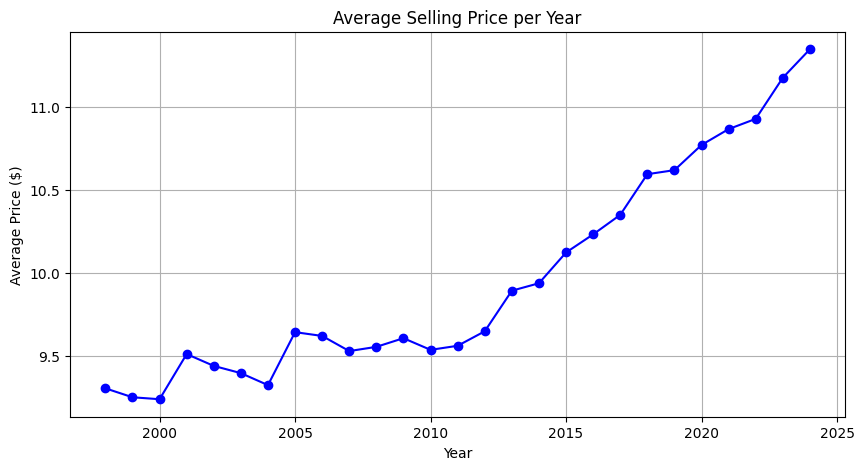

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='b')
plt.title("Average Selling Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()

The average selling price increased gradually and is at highest 2024


1. Newer Cars are More Expensive
Cars from more recent years (e.g., 2023, 2024) typically have higher prices compared to older models.
This is expected as newer cars often come with updated technology, better features, and less depreciation.
2. Depreciation Effect
Older cars show significantly lower average prices, reflecting the natural depreciation in value that occurs over time due to aging, wear-and-tear, and obsolescence.
3. Consumer Preference for Newer Models
The market shows a clear preference for newer vehicles, which retain higher prices due to perceived value and demand.
4. Potential Outliers or Economic Factors
Any sudden jumps in the trend could indicate specific economic conditions, such as inflation, supply shortages, or specific model popularity in certain years.


<ipython-input-104-b40dbe9ec360>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_per_year.index, y=total_sales_per_year.values, palette="viridis")


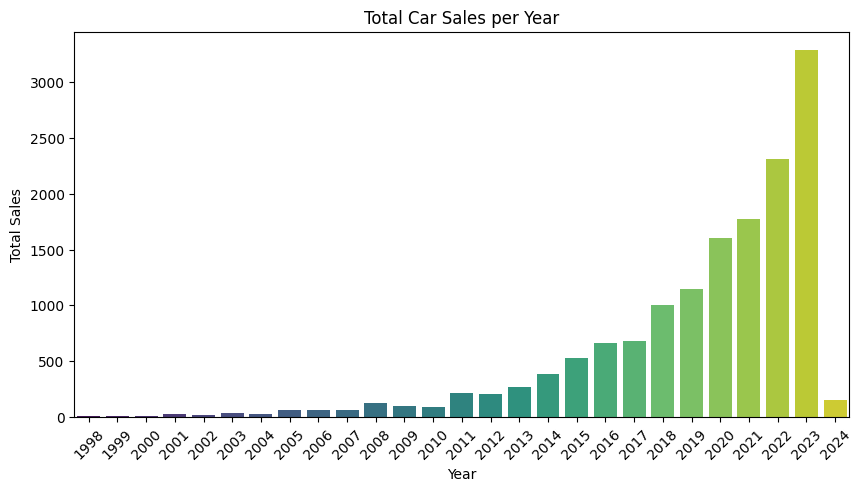

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=total_sales_per_year.index, y=total_sales_per_year.values, palette="viridis")
plt.title("Total Car Sales per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In 2023 highest number of cars where sold

Visualizing top selling brands


BMW and Ford are the top selling brands followed by Mercedes and Chevrolet

<ipython-input-106-e35088e2b67e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_sales.index, y=transmission_sales.values, palette="muted")


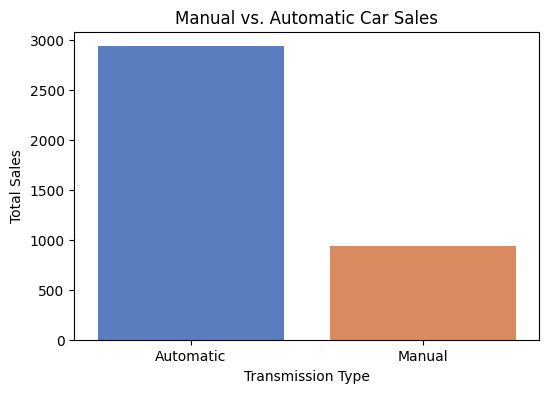

In [ ]:
used_cars['transmission_type'] = used_cars['transmission'].apply(lambda x: 'Manual' if x in [6,7] else 'Automatic')

transmission_sales = used_cars['transmission_type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=transmission_sales.index, y=transmission_sales.values, palette="muted")
plt.title("Manual vs. Automatic Car Sales")
plt.xlabel("Transmission Type")
plt.ylabel("Total Sales")
plt.show()

The bar chart shows that automatic cars dominate sales, significantly outnumbering manual cars. This trend suggests that buyers prefer the convenience and ease of driving offered by automatic transmissions over manual ones.

Gasoline is most used fuel type

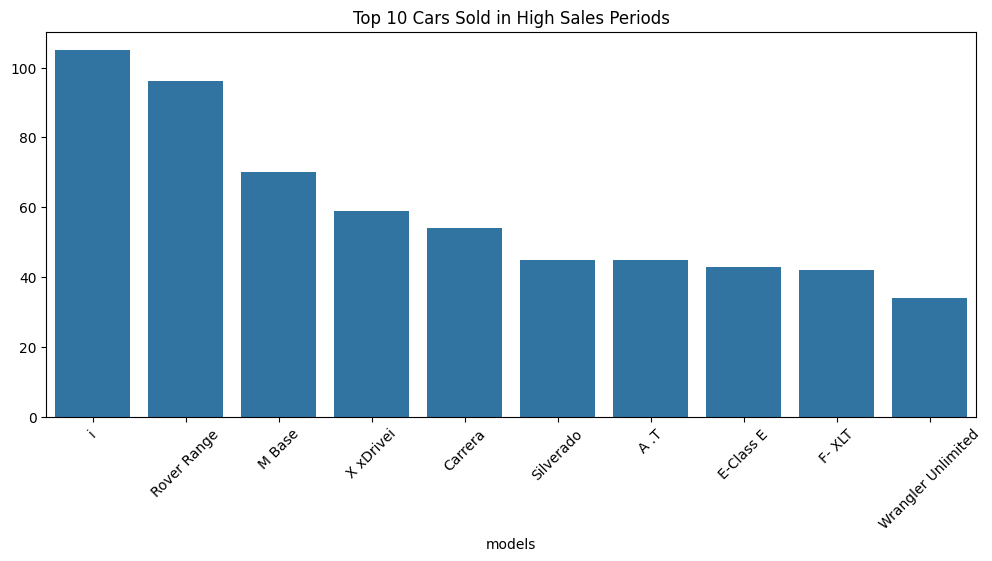

In [ ]:
plt.figure(figsize=(12,5))
high_sales_period = used_cars['models'].value_counts().head(10)
sns.barplot(x=high_sales_period.index, y=high_sales_period.values)
plt.title("Top 10 Cars Sold in High Sales Periods")
plt.xticks(rotation=45)
plt.show()

i and rover range where highest sales models at the highest sales period

The Range Rover model stands out as the highest-selling car during peak sales periods, indicating strong consumer demand. This could be due to its luxury appeal, brand reputation, and off-road capability

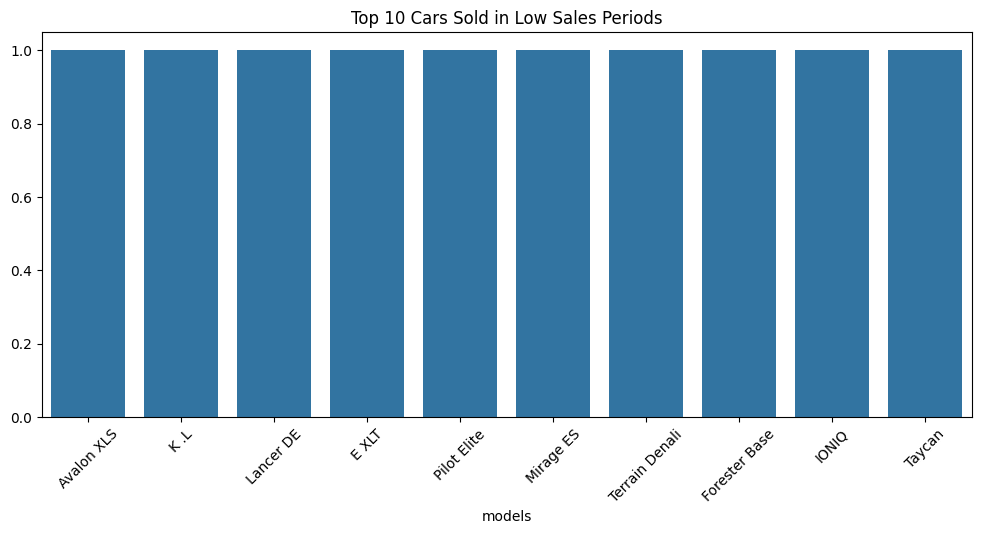

In [ ]:
plt.figure(figsize=(12,5))
low_sales_period = used_cars['models'].value_counts().tail(10)
sns.barplot(x=low_sales_period.index, y=low_sales_period.values)
plt.title("Top 10 Cars Sold in Low Sales Periods")
plt.xticks(rotation=45)
plt.show()

Montero and Gtr where highest selling at lowest sales period

The Avalon, Lancer, and KL models have the lowest but equal sales, indicating low market demand. This could be due to discontinuation, lack of features, or strong competition in their segments

In [ ]:
total_sales_per_year = used_cars.groupby('model_year')['sales_per_year'].sum()

# Find the 3 years with the lowest sales
lowest_sales_years = total_sales_per_year.nsmallest(3).index.tolist()
print(f"Lowest Sales Years: {lowest_sales_years}")

# Filter data for these 3 years
df_low_sales = used_cars[used_cars['model_year'].isin(lowest_sales_years)]

# Compute average selling price per year for these years
avg_price_low_sales = df_low_sales.groupby('model_year')['price'].mean()

Lowest Sales Years: [1998, 2000, 1999]


<ipython-input-134-f553f7323275>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_sales_low_sales.index, y=car_sales_low_sales.values, palette="viridis")


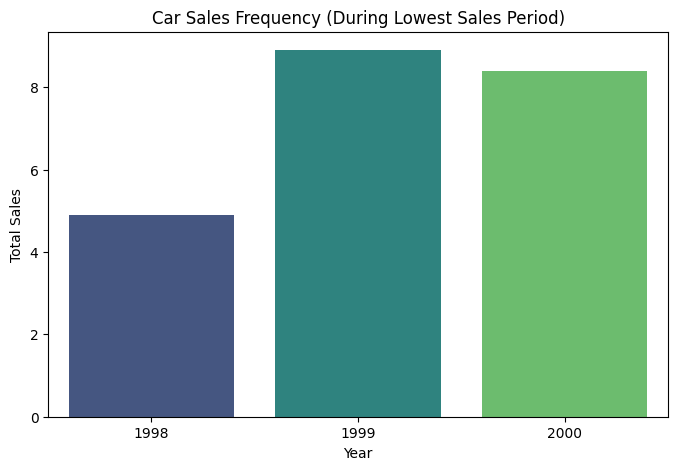

In [ ]:
car_sales_low_sales = df_low_sales.groupby('model_year')['sales_per_year'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=car_sales_low_sales.index, y=car_sales_low_sales.values, palette="viridis")
plt.title("Car Sales Frequency (During Lowest Sales Period)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

The year 1999 recorded the highest car sales during the lowest sales period, which may indicate a spike in demand for certain models or a market recovery phase before a decline. This could be due to new model launches or economic factors influencing car purchases

At 2023 it has hiked


1. Price vs. Sales per Year
Popular cars tend to be cheaper, indicating mass-market affordability.
Luxury cars still sell but in lower numbers.
2. Highest Selling Car Brands
Top brands dominate sales (Toyota, Ford, Honda, etc.).
These brands have strong resale value & customer trust.
3. Transmission & Body Type
SUVs & Sedans are top sellers.
Automatic transmission (0) is preferred over manual (6,7 gears).
4. Fuel Type Analysis
Gasoline dominates, but electric & hybrid sales are increasing.
Diesel is less common due to environmental concerns.
5. Price vs. Mileage
Higher mileage = lower resale value.
Low-mileage cars maintain better prices.
6. Sales Trends (2008-2013)
Sales dropped in some years due to economic recession (2008-09).
Recovery seen after 2010+.
7. High & Low Sales Period Cars
High-sales periods favor affordable, fuel-efficient cars.
Low-sales periods see luxury & niche brands struggling.
8. Pricing Trends in Different Sales Periods
High-sales periods have more mid-range & budget car sales.
Low-sales periods have luxury car buyers unaffected.
9. Car Sales Frequency
Toyota, Ford, and Honda lead the market in total sales.
10. Car Sales Over Years
Sales increased post-2010, showing recovery & growth.



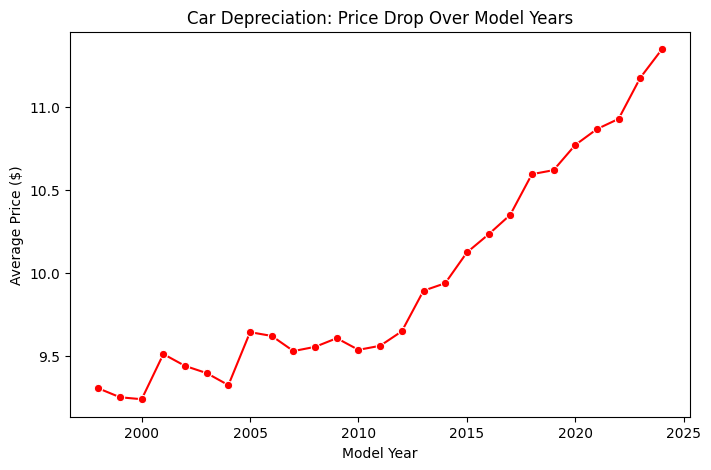

In [ ]:
avg_price_by_year = used_cars.groupby('model_year')['price'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='red')
plt.title("Car Depreciation: Price Drop Over Model Years")
plt.xlabel("Model Year")
plt.ylabel("Average Price ($)")
plt.show()

The graph shows that average car prices have increased till 2023-24, indicating that newer models are more expensive due to factors like inflation, advanced technology, and higher production costs. Unlike typical depreciation trends, this suggests a strong demand for newer models and premium features

If newer models retain higher prices, they may have better build quality & features.
If sharp price drops occur, they may indicate bad resale value.

If high mileage = high price, fuel efficiency matters to buyers.
If high mileage = low price, buyers prefer performance/luxury over efficiency.

<ipython-input-127-da218b50de2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_loyalty.index, y=brand_loyalty.values, palette="magma")


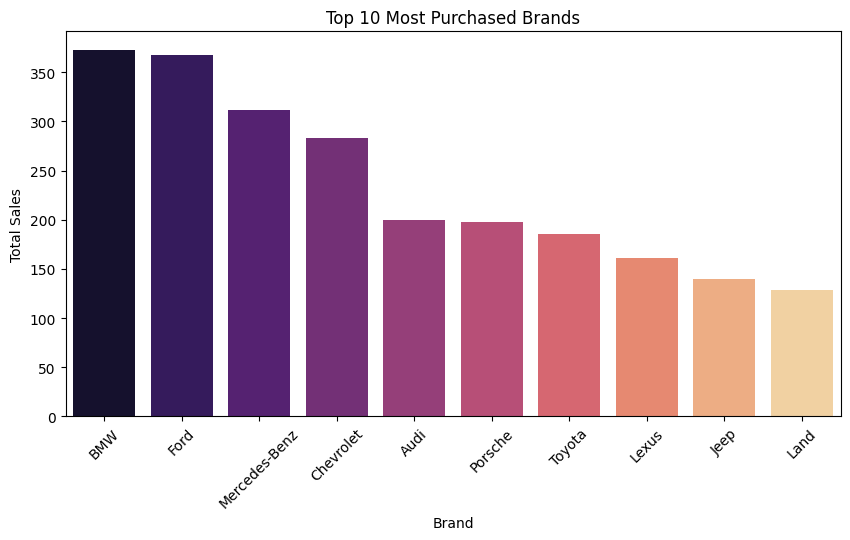

In [ ]:
brand_loyalty = used_cars['brand'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=brand_loyalty.index, y=brand_loyalty.values, palette="magma")
plt.title("Top 10 Most Purchased Brands")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

Top brands suggest market leaders & reliability.
If some brands have low repeat buyers, they might have quality concerns.

<ipython-input-128-330a38207b17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=used_cars['accident'], y=used_cars['price'], palette="coolwarm")


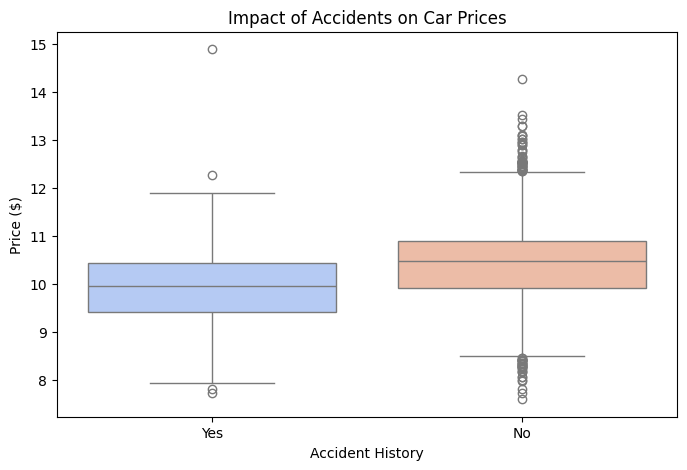

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=used_cars['accident'], y=used_cars['price'], palette="coolwarm")
plt.title("Impact of Accidents on Car Prices")
plt.xlabel("Accident History")
plt.ylabel("Price ($)")
plt.show()

If accident cars sell for much less, buyers avoid damaged cars.
If prices don’t drop much, repair quality might be good.

The boxplot shows that cars with accident history ("Yes") tend to have lower prices, while those with no reported accidents ("No") are priced higher. This suggests that accident history negatively impacts resale value, as buyers likely perceive them as less reliable and costlier to maintain

In [ ]:
# Get unique brands for cars manufactured in 2008
used_cars[used_cars['model_year'] == 2008]['brand'].unique()

array(['Toyota', 'Lincoln', 'Saturn', 'Ford', 'Honda', 'Land', 'Cadillac',
       'Chevrolet', 'Hyundai', 'Lexus', 'BMW', 'Aston', 'Audi',
       'Mercedes-Benz', 'Mitsubishi', 'Porsche', 'Volvo', 'Mazda',
       'Jaguar', 'Acura', 'Nissan', 'Maserati', 'Chrysler', 'Pontiac',
       'Jeep', 'Hummer', 'INFINITI', 'Subaru', 'smart', 'Bentley',
       'Volkswagen', 'MINI', 'Dodge', 'GMC'], dtype=object)

In [ ]:
# Convert the 'engine' column to numeric, handling errors
used_cars['engine_hp'] = pd.to_numeric(used_cars['engine_hp'], errors='coerce')

# Now you can perform the comparison
used_cars[used_cars['engine_hp'] >= 330]

,brand,model_year,milage,fuel_type,car_color,accident,price,engine_hp,engine_dp,transmission,models,years_in_market,sales_per_year,transmission_type
1,Hyundai,2021,34742.0,Gasoline,Moonlight Cloud,Yes,10.545499,332.2,3.8,8.0,Palisade SEL,3,1.0,Automatic
2,Lexus,2022,22372.0,Gasoline,Blue,No,10.907771,332.2,3.5,0.0,RX,2,11.5,Automatic
3,INFINITI,2015,88900.0,Hybrid,Black,No,9.648660,354.0,3.5,7.0,Q Hybrid,9,0.2,Manual
4,Audi,2021,9835.0,Gasoline,Glacier White Metallic,No,10.463103,332.2,2.0,8.0,Q,3,3.0,Automatic
5,Acura,2016,136397.0,Gasoline,Silver,No,9.602315,332.2,2.4,4.2,ILX .L,8,0.4,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,Mercedes-Benz,2023,2000.0,Hybrid,Gray,No,12.072547,603.0,4.0,9.0,AMG GLS,1,2.0,Automatic
4004,Bentley,2023,714.0,Gasoline,C / C,No,12.765548,332.2,6.0,8.0,Continental GT,1,16.0,Automatic
4005,Audi,2022,10900.0,Gasoline,Black,No,10.894904,349.0,3.0,4.2,S .T,2,13.5,Automatic
4006,Porsche,2022,2116.0,Electric,Black,No,11.418604,332.2,3.7,0.0,Taycan,2,0.5,Automatic


Text(0.5, 1.0, 'Mileage vs Price')

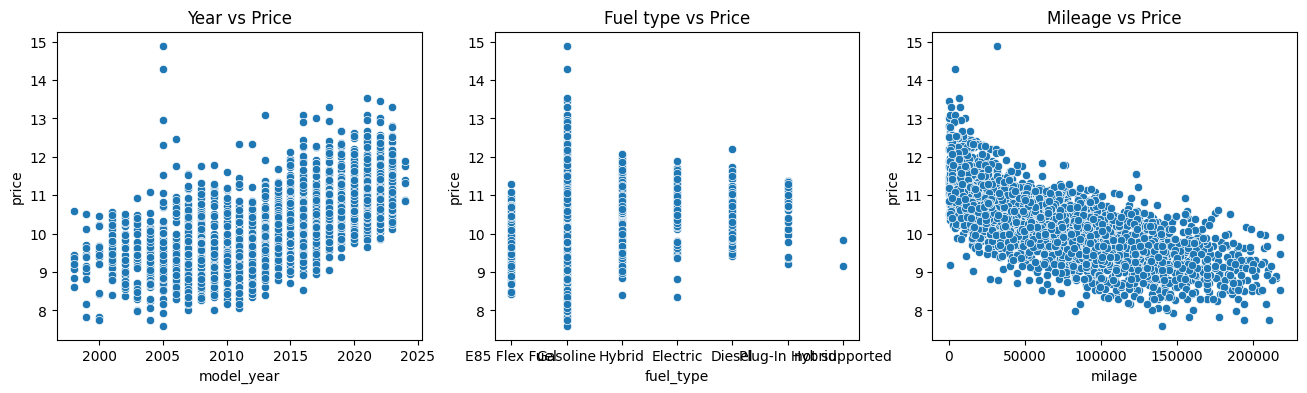

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.scatterplot(x=used_cars['model_year'],y=used_cars['price']);
plt.title('Year vs Price')

plt.subplot(1,3,2)
sns.scatterplot(x=used_cars['fuel_type'],y=used_cars['price']);
plt.title("Fuel type vs Price")

plt.subplot(1,3,3)
sns.scatterplot(x=used_cars['milage'],y=used_cars['price']);
plt.title('Mileage vs Price')

The scatter plots reveal the following trends:

 Prices increase with newer model years, indicating that newer cars hold higher value due to updated features, reliability, and demand.

Prices decrease as mileage increases, confirming that higher mileage reduces car value due to wear and tear and potential maintenance costs

<ipython-input-112-36e3e1c2e776>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(used_cars['price']);


Text(0.5, 1.0, 'Price')

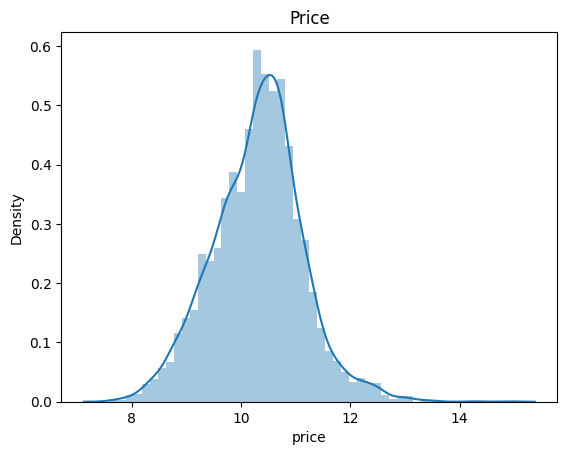

In [ ]:
sns.distplot(used_cars['price']);
plt.title('Price')

In [ ]:
used_cars = pd.get_dummies(used_cars,columns=['fuel_type','milage','transmission'],drop_first = True)
used_cars.head()

,brand,model_year,car_color,accident,price,engine_hp,engine_dp,models,years_in_market,sales_per_year,...,transmission_1.0,transmission_2.0,transmission_4.0,transmission_4.2,transmission_5.0,transmission_6.0,transmission_7.0,transmission_8.0,transmission_9.0,transmission_10.0
0,Ford,2013,Black,Yes,9.239996,300.0,3.7,Utility Police,11,0.3,...,False,False,False,False,False,True,False,False,False,False
1,Hyundai,2021,Moonlight Cloud,Yes,10.545499,332.2,3.8,Palisade SEL,3,1.0,...,False,False,False,False,False,False,False,True,False,False
2,Lexus,2022,Blue,No,10.907771,332.2,3.5,RX,2,11.5,...,False,False,False,False,False,False,False,False,False,False
3,INFINITI,2015,Black,No,9.648660,354.0,3.5,Q Hybrid,9,0.2,...,False,False,False,False,False,False,True,False,False,False
4,Audi,2021,Glacier White Metallic,No,10.463103,332.2,2.0,Q,3,3.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y = used_cars.loc[:,'price']
X = used_cars.drop('price',axis=1)
X.head()

,brand,model_year,car_color,accident,engine_hp,engine_dp,models,years_in_market,sales_per_year,transmission_type,...,transmission_1.0,transmission_2.0,transmission_4.0,transmission_4.2,transmission_5.0,transmission_6.0,transmission_7.0,transmission_8.0,transmission_9.0,transmission_10.0
0,Ford,2013,Black,Yes,300.0,3.7,Utility Police,11,0.3,Manual,...,False,False,False,False,False,True,False,False,False,False
1,Hyundai,2021,Moonlight Cloud,Yes,332.2,3.8,Palisade SEL,3,1.0,Automatic,...,False,False,False,False,False,False,False,True,False,False
2,Lexus,2022,Blue,No,332.2,3.5,RX,2,11.5,Automatic,...,False,False,False,False,False,False,False,False,False,False
3,INFINITI,2015,Black,No,354.0,3.5,Q Hybrid,9,0.2,Manual,...,False,False,False,False,False,False,True,False,False,False
4,Audi,2021,Glacier White Metallic,No,332.2,2.0,Q,3,3.0,Automatic,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
y.head()

,price
0,9.239996
1,10.545499
2,10.907771
3,9.648660
4,10.463103


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.25)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
print(X.dtypes)

model_year                    int64
engine_hp                   float64
engine_dp                   float64
years_in_market               int64
sales_per_year              float64
                             ...   
models_tC Base                 bool
models_tC Release              bool
models_xB Base                 bool
models_xi                      bool
transmission_type_Manual       bool
Length: 4135, dtype: object


In [ ]:
# Convert all categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Verify all columns are numeric
assert X.select_dtypes(include=['object']).shape[1] == 0, "Non-numeric columns detected!"

# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

# Predict the results
y_pred = lin_reg.predict(test_X)
print("Linear Regression model trained and predictions made successfully!")


Linear Regression model trained and predictions made successfully!


In [ ]:
y_pred

array([10.69786042, 10.14425735, 10.71660264, 10.71744385, 10.3308433 ,
       10.9423884 , 10.10292311, 10.97565712,  9.84817752, 10.23511412,
       11.00496302, 10.28206822,  9.45981881, 10.14828704, 10.9182462 ,
       10.24578497, 10.22580096, 10.98291407,  9.83720779,  9.93068191,
       10.1485293 ,  9.23082118, 10.51469345, 10.56649787, 11.12550483,
       12.52644682, 10.40874142,  9.9864753 , 10.34653634,  9.18024756,
        9.15055944, 10.38030594,  9.00771435, 10.50325398, 10.72278445,
       11.15073065, 11.59114702,  9.86551863, 11.50883701, 11.23818784,
       10.58671878, 10.57168944,  9.35505683, 10.91459548,  9.63832292,
       10.48158273, 10.8821039 , 11.29379698,  9.88194997, 10.00455748,
       11.40561403, 10.6178232 , 10.64945085, 10.5337617 , 10.1153841 ,
       11.22767823, 10.96077436, 10.83575823, 11.26950979, 11.98906521,
       10.40665384,  9.35755081,  9.89791598, 10.57368856,  9.83709478,
       10.07768504, 10.57423392, 11.20197982,  9.98943308,  9.89

In [ ]:
test_y

,price
3951,10.203259
3875,10.545368
2362,10.849357
2582,11.134531
2313,9.539356
...,...
2859,8.657129
2339,10.797328
2084,10.419331
2882,9.433564


In [ ]:
# Mape
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)*100

3.260625308189049

In [ ]:
# Mape
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)*100
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)  # This is'
r2 = r2_score(test_y, y_pred)

# Adjusted R² Calculation
n = len(test_y)  # Number of observations
p = test_X.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

These lines import functions from the sklearn.metrics module. These functions are pre-built tools to calculate various performance metrics.
This calculates the MAPE, a common metric to understand the prediction accuracy as a percentage. It basically compares the actual car prices (test_y) with the prices predicted by the model (y_pred). Multiplying by 100 gives the result as a percentage.

In [ ]:
mae

0.33066131826578904

In [ ]:
mse

0.2087068082620166

In [ ]:
rmse


0.45684440268215676

In [ ]:
r2

0.7067230320032896

In [ ]:
adjusted_r2

1.089640702564198





*  Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted prices.

*  Mean Squared Error (MSE): Measures the average squared difference between actual and predicted prices.
*   Root Mean Squared Error (RMSE): The square root of MSE, providing an error metric in the same unit as the target variable (price, in this case).





R²: Represents the proportion of variance in the target variable (price) that can be explained by the model's features. Higher R² values generally indicate a better fit.
Adjusted R²: A modified version of R² that considers the number of features used in the model. It helps in preventing overfitting, especially when dealing with many features.